In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
import os
import json
from zipfile import ZipFile

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
kaggle_credentials=json.load(open("kaggle.json"))

In [ ]:
#setup kaggle API keyy as environmental variables
os.environ["KAGGLE_USERNAME"]=kaggle_credentials["username"]
os.environ["KAGGLE_KEY"]=kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:09<00:00, 45.0MB/s]
100% 2.70G/2.70G [01:09<00:00, 41.6MB/s]


In [ ]:
#unzip the downloaded datset
with ZipFile("new-plant-diseases-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

**Data Preprocessing**

In [ ]:
#Training image preprocessing
training_set=tf.keras.utils.image_dataset_from_directory(
    "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 70295 files belonging to 38 classes.


In [ ]:
#Validation image preprocessing
validation_set=tf.keras.utils.image_dataset_from_directory(
    "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()

**Building Convolutional Layer**

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=38,activation="softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

1.to avoid overshooting choose small learning rate 0.0001
2.there may be a chance of underfitting so increase number of neurons
3.Add more convolutional layers to extract more features from image

In [ ]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 178s 75ms/step - loss: 1.3090 - accuracy: 0.6084 - val_loss: 0.5918 - val_accuracy: 0.8114
Epoch 2/10
2197/2197 [==============================] - 175s 79ms/step - loss: 0.4497 - accuracy: 0.8563 - val_loss: 0.3265 - val_accuracy: 0.8966
Epoch 3/10
2197/2197 [==============================] - 162s 74ms/step - loss: 0.2663 - accuracy: 0.9145 - val_loss: 0.2607 - val_accuracy: 0.9164
Epoch 4/10
2197/2197 [==============================] - 163s 74ms/step - loss: 0.1825 - accuracy: 0.9405 - val_loss: 0.2114 - val_accuracy: 0.9393
Epoch 5/10
2197/2197 [==============================] - 163s 74ms/step - loss: 0.1357 - accuracy: 0.9557 - val_loss: 0.1621 - val_accuracy: 0.9507
Epoch 6/10
2197/2197 [==============================] - 164s 74ms/step - loss: 0.1087 - accuracy: 0.9638 - val_loss: 0.1332 - val_accuracy: 0.9590
Epoch 7/10
2197/2197 [==============================] - 163s 74ms/step - loss: 0.0866 - accuracy: 0.9715 - val_loss: 0

**Model Evaluation on training set**

In [ ]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 57s 26ms/step - loss: 0.0273 - accuracy: 0.9913


In [ ]:
print(train_loss,train_acc)

0.027347201481461525 0.9912796020507812


**Model on Validation Set**

In [ ]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 14s 25ms/step - loss: 0.1098 - accuracy: 0.9686


**Saving Model**

In [ ]:
# model.save("drive/MyDrive/cropproject/NEW_CROP_DISEASE_DETECTION_MODEL.keras")
model.save("drive/MyDrive/cropproject/NEW_CROP_DISEASE_DETECTION_MODEL.h5")

In [1]:
training_history.history

NameError: name 'training_history' is not defined

In [ ]:
#recording History in json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

**Accuracy Visualization**

In [ ]:
training_history.history['accuracy']

[0.6084216237068176,
 0.8562771081924438,
 0.9145458340644836,
 0.9404509663581848,
 0.9557294249534607,
 0.9637527465820312,
 0.971463143825531,
 0.9757877588272095,
 0.9793868660926819,
 0.9823458194732666]

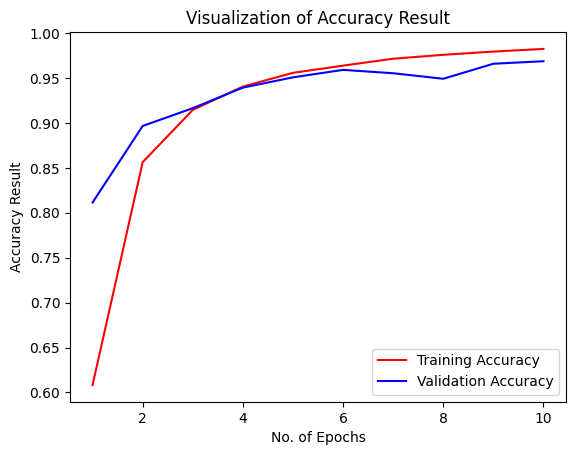

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy Result")
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

**Some other metrics for model Evaluation**

In [ ]:
class_name = validation_set.class_names
# class_name

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 15s 27ms/step


(array([[9.9995041e-01, 3.3663941e-06, 2.0332335e-07, ..., 2.0575380e-11,
         4.4684513e-11, 4.9264776e-10],
        [9.9999583e-01, 4.2128177e-06, 1.8468556e-12, ..., 3.7316811e-17,
         2.2638539e-17, 3.0459565e-15],
        [9.9999952e-01, 3.5472262e-08, 3.5597805e-07, ..., 3.3755279e-16,
         3.8050404e-14, 1.9356875e-12],
        ...,
        [7.6160269e-14, 1.3342318e-17, 8.0493191e-13, ..., 4.9885528e-14,
         4.1822887e-15, 1.0000000e+00],
        [8.8165689e-13, 7.9403661e-17, 1.9974277e-11, ..., 2.4017218e-12,
         1.1801429e-12, 9.9999988e-01],
        [4.7334414e-16, 1.2935862e-17, 1.4674370e-13, ..., 2.2895377e-15,
         1.5963161e-12, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories= tf.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.98      0.97      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.98      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.90      0.

In [ ]:
cm.shape

(38, 38)

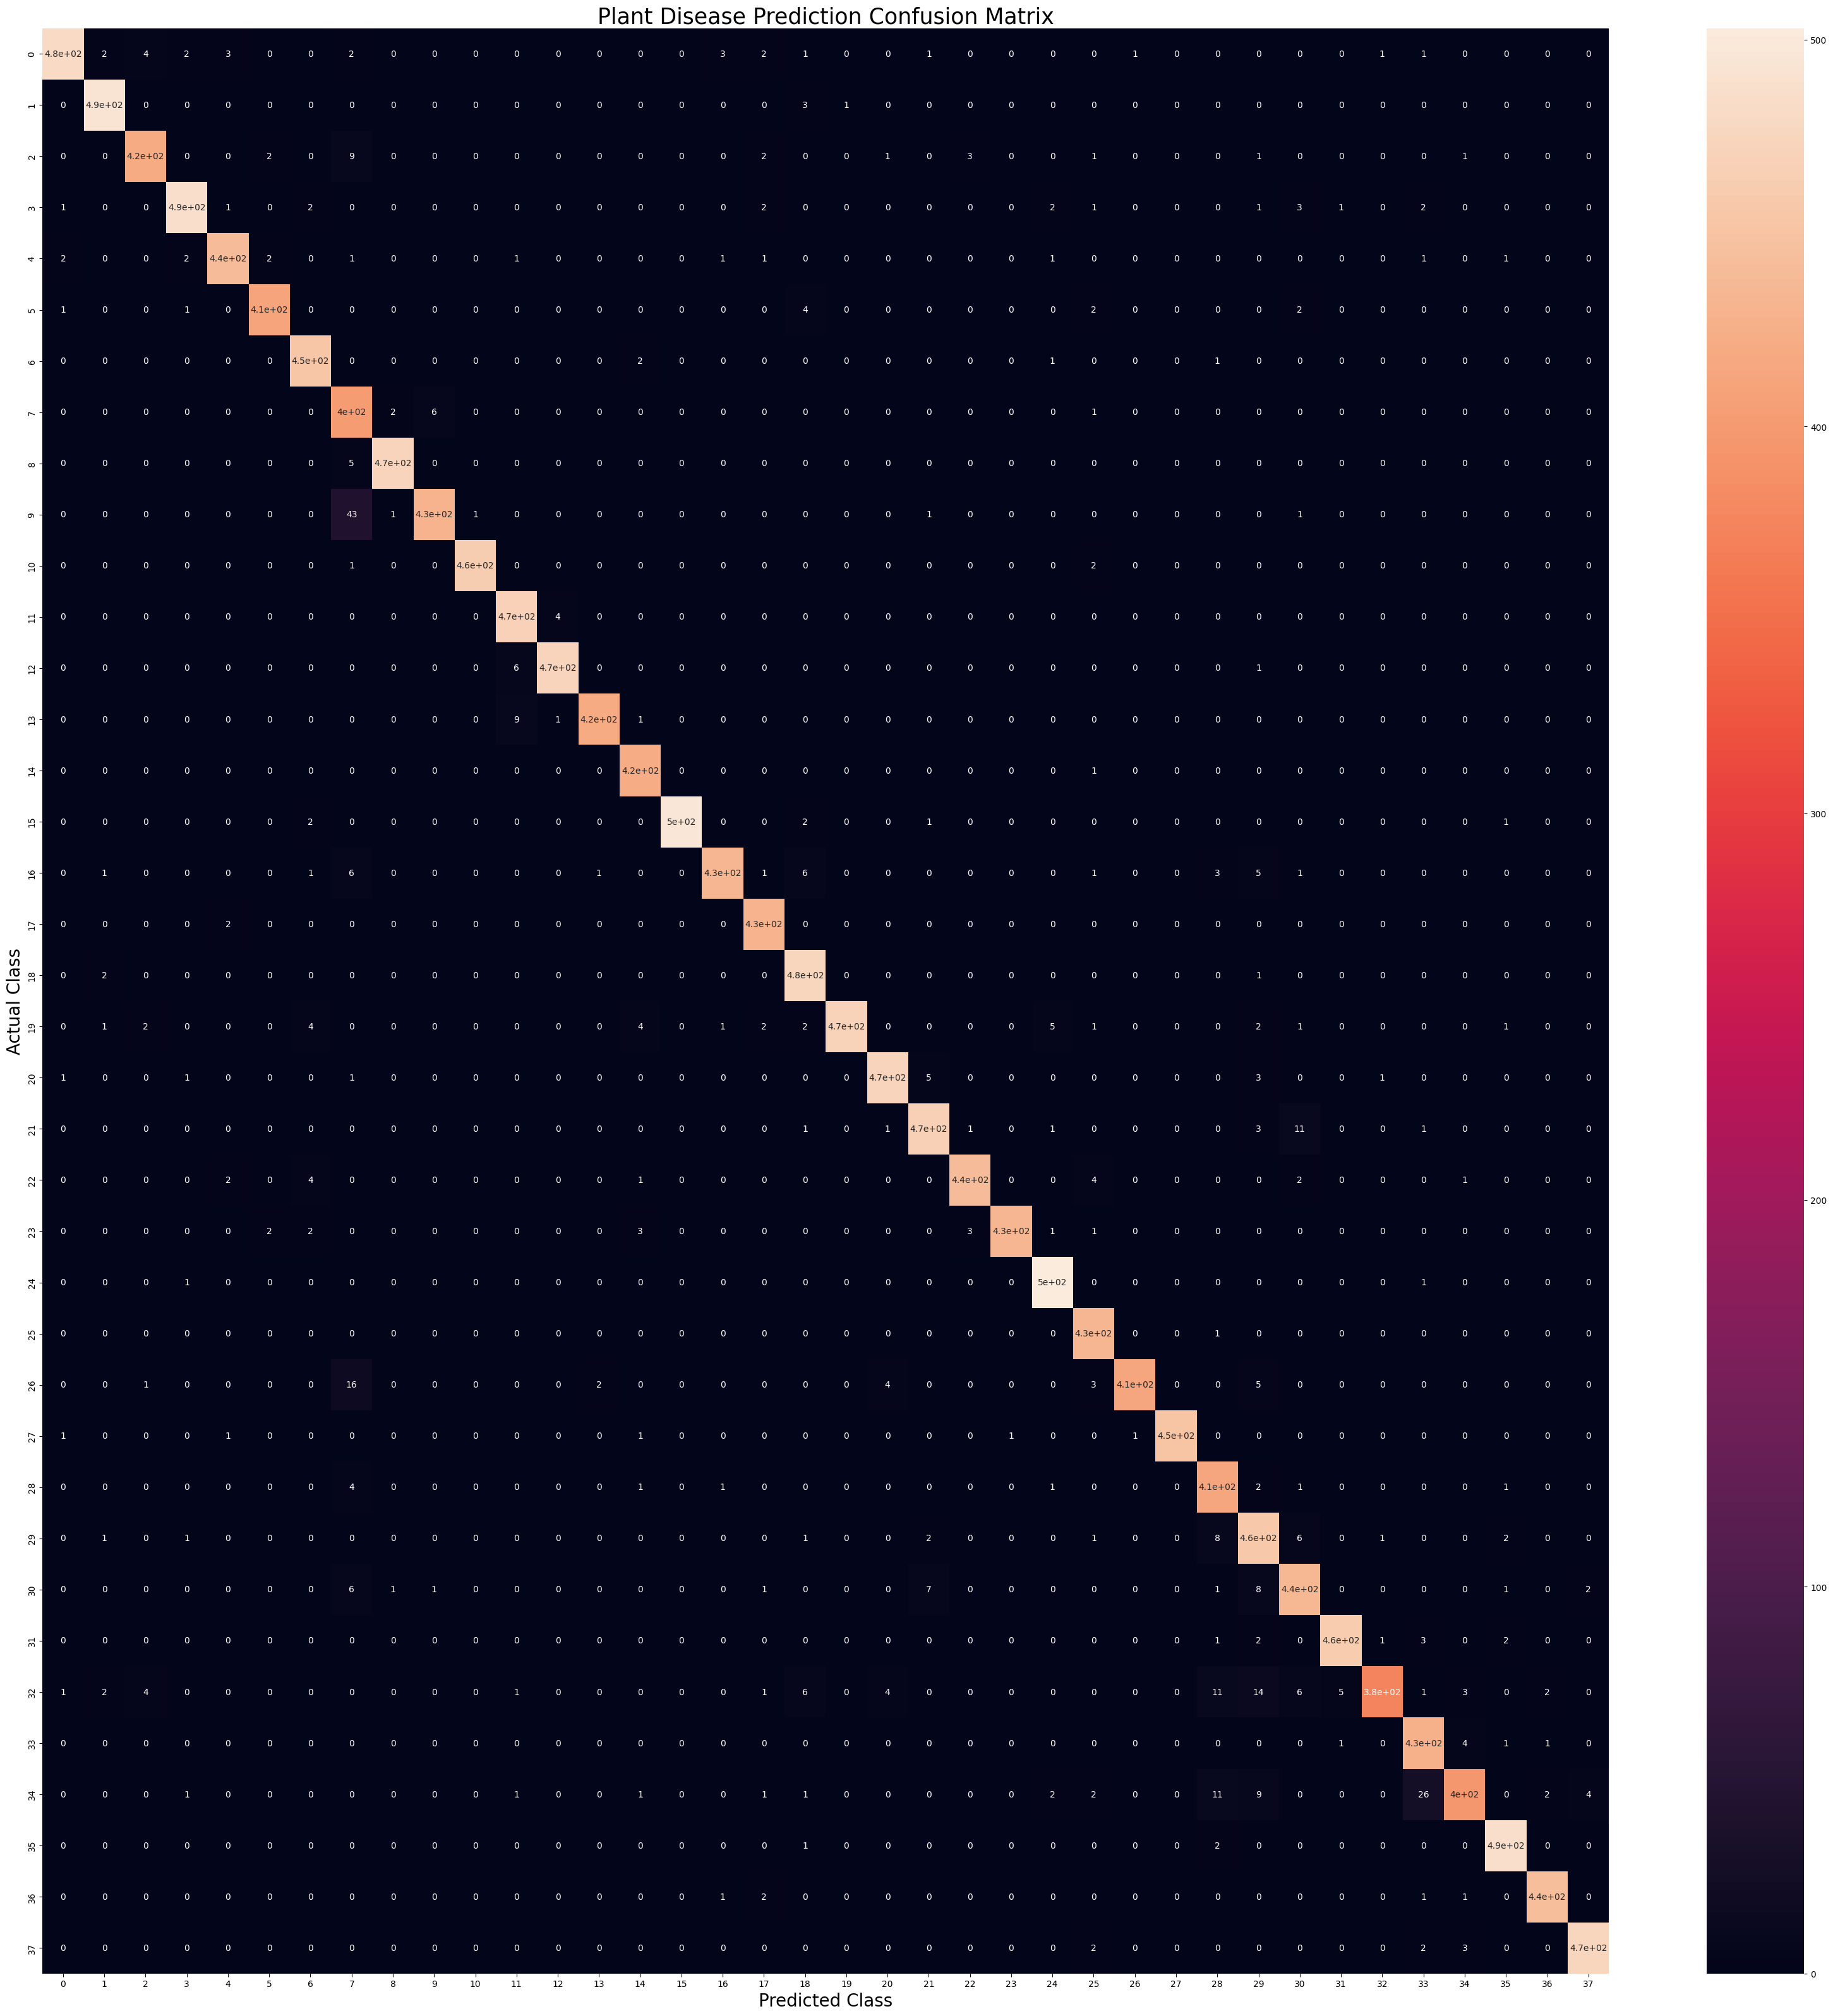

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()